In [1]:
# Import the required packages.

import numpy as np
import pandas as pd
import sklearn

In [2]:
# Load dataset

data = pd.read_csv(f'insurance.csv')

In [9]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
# Looking statistics data

data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Create a dependent variable and independent variable

X = data.drop('charges', axis=1)
y = data['charges']

In [12]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [13]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

## Handling missing values

In [15]:
# Count the missing values in each column of dataset

print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [16]:
# Removing(drop) the missing values 
data_01 = data.dropna(inplace = True)

In [23]:
# Replace missing value without drop all records
from sklearn.impute import SimpleImputer

# Separate numerical and categorical columns
num_col = data.select_dtypes(include=['float64', 'int64']).columns
cat_col = data.select_dtypes(include=['object']).columns

# Impute numerical column with mean
num_imputer = SimpleImputer(strategy = 'mean')
data[num_col] = num_imputer.fit_transform(data[num_col])

# Impute categorical columns
cat_imputer = SimpleImputer(strategy = 'most_frequent')
data[cat_col] = cat_imputer.fit_transform(data[cat_col])

# Dsiplay the results 
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


## Data Encoding (Handle categorical data)

In [25]:
# One Hot encoding 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Separate the independent variable (X)
X = data.drop('charges', axis = 1)

# Define the ColumnTransformer
ct = ColumnTransformer(
    transformers = [
        ('encoder', OneHotEncoder(), ['sex', 'smoker', 'region'])
    ],
    remainder = 'passthrough' # Leave the other column unchanged
)

# Apply the ColumnTransformer
X_transformed = ct.fit_transform(X)

# Get feature names for the one-hot encoded columns
encoded_feature_names = ct.named_transformers_['encoder'].get_feature_names_out(['sex', 'smoker', 'region'])

# Combine encoded feature names with the remainder column names
all_feature_names = np.concatenate([encoded_feature_names, X.columns.difference(['sex', 'smoker', 'region'])])

# Convert the transformed data into a DataFrame
X_transformed_df = pd.DataFrame(X_transformed, columns=all_feature_names)

# Display the resulting DataFrame
X_transformed_df.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0


In [8]:
# Data Encoding for using Tensorflow

import tensorflow as tf
# Convert categorical column into integer indices
X = data.drop('charges', axis = 1)

for col in ['sex', 'smoker', 'region']:
     X[col] = pd.Categorical(X[col]).codes

# Encode each categorical column using tf.one_hot
sex_encoded = tf.one_hot(indices = X['sex'], depth = len(data['sex'].unique()), axis = -1).numpy()
smoker_encoded = tf.one_hot(indices = X['smoker'], depth = len(data['smoker'].unique()), axis = -1).numpy()
region_encoded = tf.one_hot(indices = X['region'], depth = len(data['region'].unique()), axis = -1).numpy()

# Create descriptive column names
sex_labels = pd.Categorical(data['sex']).categories
smoker_labels = pd.Categorical(data['smoker']).categories
region_labels = pd.Categorical(data['region']).categories



# Create a new column names
sex_columns = [f'sex_{label}' for label in sex_labels]
smoker_columns = [f'smoker_{label}' for label in smoker_labels]
region_columns = [f'region_{label}' for label in region_labels]


# Convert one-hot encoded array into dataframe
df_sex = pd.DataFrame(sex_encoded, columns = sex_columns)
df_smoker = pd.DataFrame(smoker_encoded, columns = smoker_columns)
df_region = pd.DataFrame(region_encoded, columns = region_columns)


# Combine the original numerical columns with the one-hot enocoded columns
X_encoded = pd.concat([X.drop(columns = ['sex', 'smoker', 'region']), df_sex, df_smoker, df_region], axis = 1)

# Display the update dataset
X_encoded.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [27]:
# Label encoding 

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Perform label encoding
data['smoker'] = le.fit_transform(data['smoker'])

# Display the Dataframe with original and encoded columns
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,1,southwest,16884.92400
1,18.0,male,33.770,1.0,0,southeast,1725.55230
2,28.0,male,33.000,3.0,0,southeast,4449.46200
3,33.0,male,22.705,0.0,0,northwest,21984.47061
4,32.0,male,28.880,0.0,0,northwest,3866.85520


In [10]:
# Split dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 42)

X.shape, X_train.shape

((1338, 6), (1070, 11))

### Feature scaling - Standardization & Normalization

In [12]:
# Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Use a list of column names to select multiple columns
columns_to_scale = ['age', 'bmi', 'children']

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.fit_transform(X_test[columns_to_scale])

In [84]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_0,smoker_1,region_northeast,region_northwest,region_southeast,region_southwest
560,0.472227,-1.756525,0.734336,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1285,0.543313,-1.033082,-0.911192,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1142,0.898745,-0.943687,-0.911192,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
969,-0.025379,0.622393,3.202629,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
486,1.040918,-1.504893,1.557100,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [14]:
# Normalization 

from sklearn.preprocessing import MinMaxScaler

# Initializiing MinMaxscaler
scaler = MinMaxScaler()

columns_to_scale = ['age', 'bmi', 'children']

data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

data.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,0.321227,0.0,yes,southwest,16884.92400
1,0.000000,male,0.479150,0.2,no,southeast,1725.55230
2,0.217391,male,0.458434,0.6,no,southeast,4449.46200
3,0.326087,male,0.181464,0.0,no,northwest,21984.47061
4,0.304348,male,0.347592,0.0,no,northwest,3866.85520


## How to identify outliers and how to remove outliers

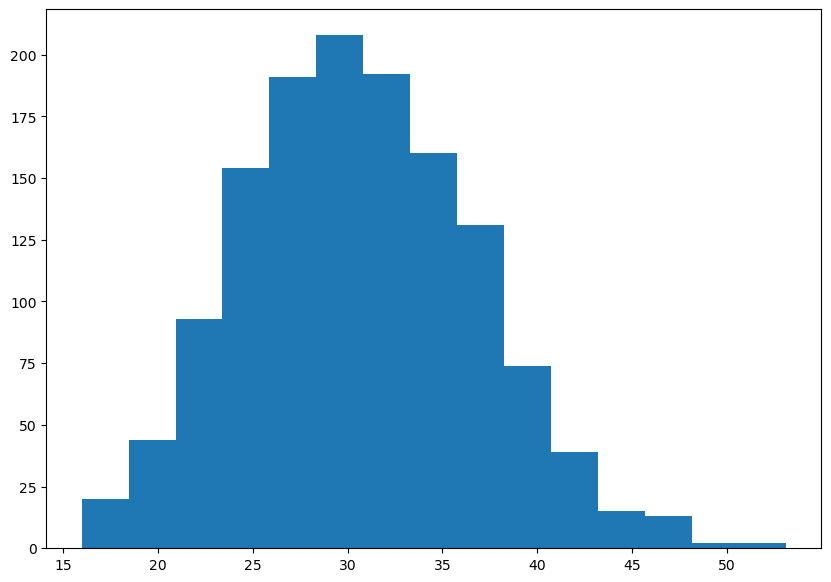

In [22]:
import matplotlib.pyplot as plt

# Find a outliers 


data_01 = pd.read_csv(f'insurance.csv')

plt.figure(figsize = (10, 7))
plt.hist(data_01['bmi'], bins = 15)
plt.show()

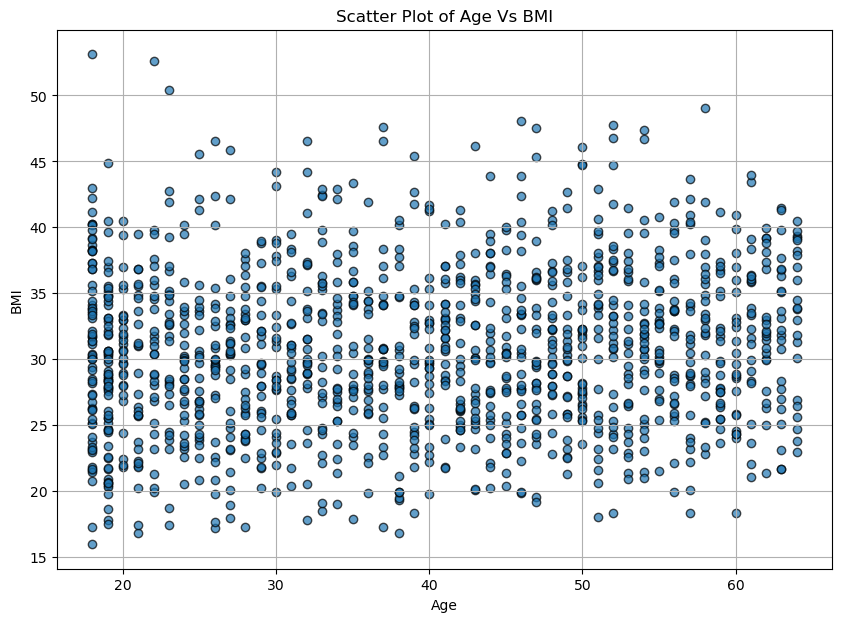

In [34]:
plt.figure(figsize=(10, 7))

plt.scatter(data_01['age'], data_01['bmi'], alpha = 0.7, edgecolor = 'k')
plt.title('Scatter Plot of Age Vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

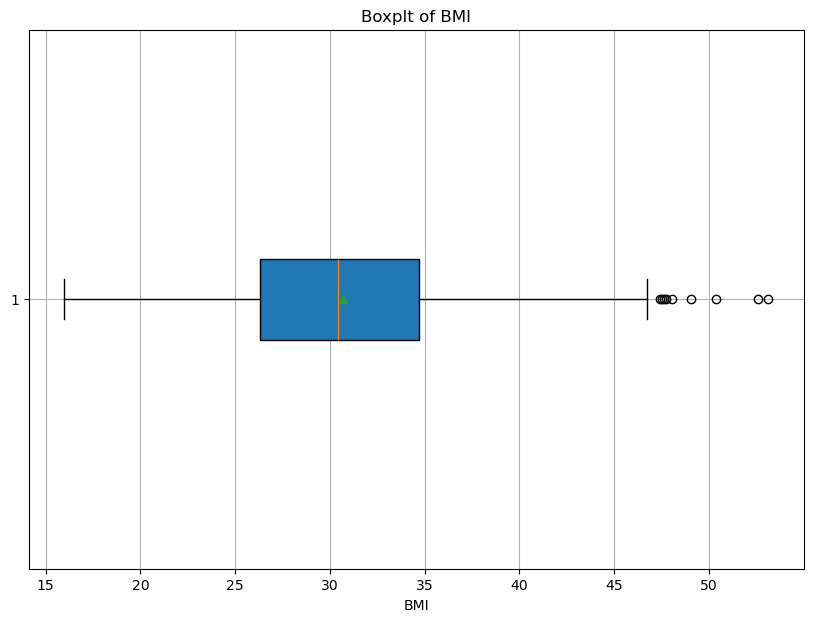

In [56]:
plt.figure(figsize = (10, 7))

plt.boxplot(data_01['bmi'], vert = False, patch_artist = True, showmeans = True)
plt.title('Boxplt of BMI')
plt.xlabel('BMI')
plt.grid(True)
plt.show()

In [24]:
# Quantile method

lowerbound = data_01['bmi'].quantile(0.05)
lowerbound

21.256000000000004

In [26]:
upperbound = data_01['bmi'].quantile(0.95)
upperbound

41.105999999999995

In [28]:
# Print the all recods having outliers in lowerbound

data_01[data_01['bmi'] < lowerbound]

,age,sex,bmi,children,smoker,region,charges
28,23,male,17.385,1,no,northwest,2775.19215
35,19,male,20.425,0,no,northwest,1625.43375
37,26,male,20.800,0,no,southwest,2302.30000
98,56,male,19.950,0,yes,northeast,22412.64850
99,38,male,19.300,0,yes,southwest,15820.69900
...,...,...,...,...,...,...,...
1260,32,female,20.520,0,no,northeast,4544.23480
1286,28,female,17.290,0,no,northeast,3732.62510
1290,38,female,19.950,2,no,northeast,7133.90250
1302,25,female,20.800,1,no,southwest,3208.78700


In [30]:
# Print the all recods having outliers in upperbound

data_01[data_01['bmi'] > upperbound]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
83,48,female,41.230,4,no,northwest,11033.66170
116,58,male,49.060,0,no,southeast,11381.32540
170,63,male,41.470,0,no,southeast,13405.39030
185,36,male,41.895,3,yes,northeast,43753.33705
...,...,...,...,...,...,...,...
1239,25,female,42.130,1,no,southeast,3238.43570
1240,52,male,41.800,2,yes,southeast,47269.85400
1312,34,male,42.900,1,no,southwest,4536.25900
1317,18,male,53.130,0,no,southeast,1163.46270


In [38]:
# Remove the outliers 

data_01_free_outliers = data_01[(data_01['bmi'] > lowerbound) & (data_01['bmi'] < upperbound)]

data_01_free_outliers.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


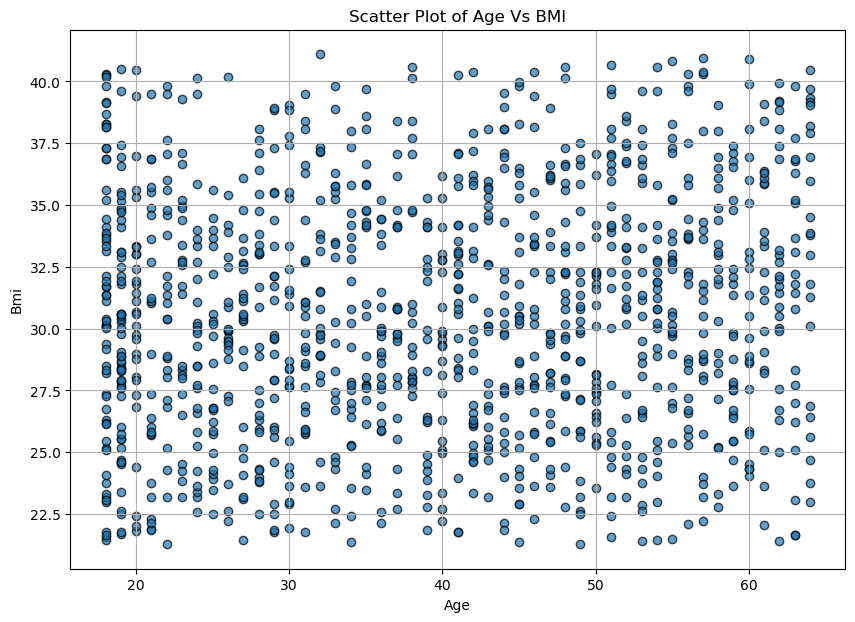

In [40]:
# Ensure the outliers free

plt.figure(figsize = (10, 7))

plt.scatter(data_01_free_outliers['age'], data_01_free_outliers['bmi'], alpha = 0.7, edgecolor = 'k' )
plt.title('Scatter Plot of Age Vs BMI')
plt.xlabel('Age')
plt.ylabel('Bmi')
plt.grid(True)
plt.show()

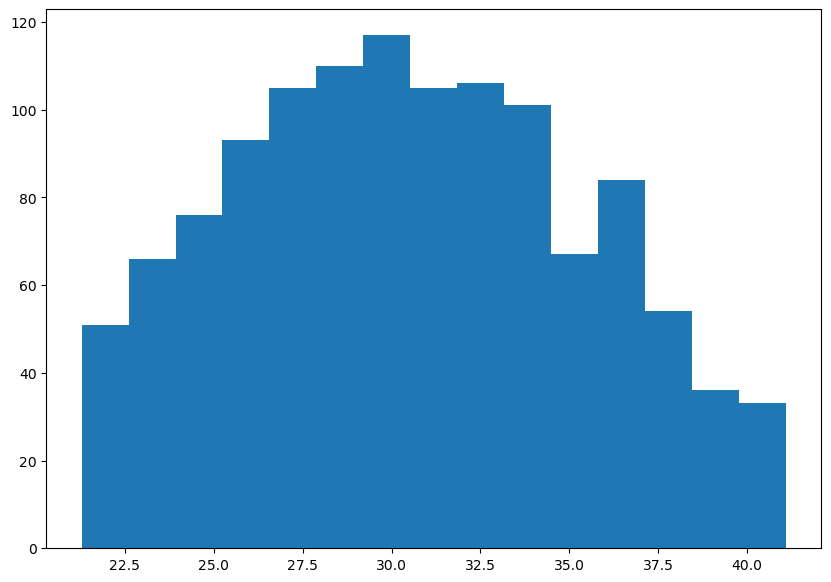

In [42]:
plt.figure(figsize = (10, 7))
plt.hist(data_01_free_outliers['bmi'], bins = 15)
plt.show()

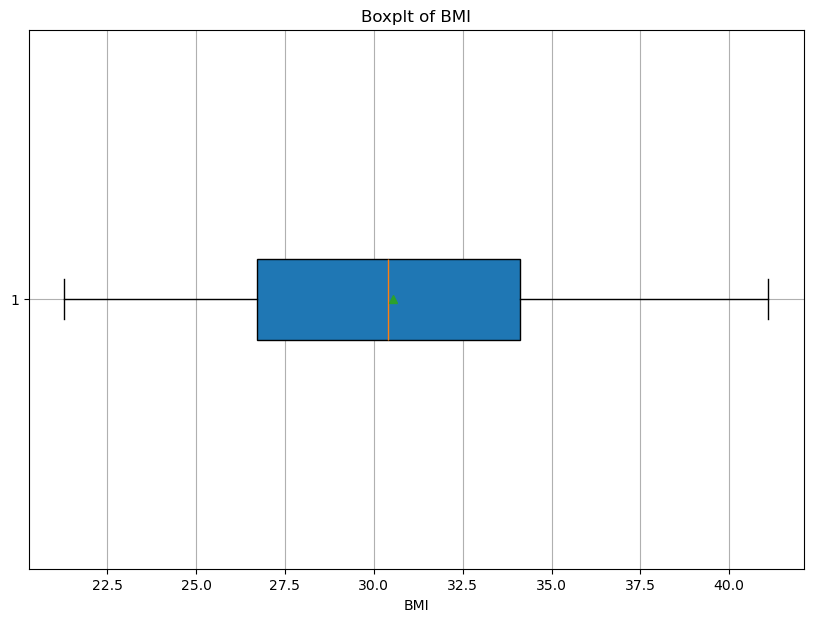

In [58]:
plt.figure(figsize = (10, 7))

plt.boxplot(data_01_free_outliers['bmi'], vert = False, patch_artist = True, showmeans = True)
plt.title('Boxplt of BMI')
plt.xlabel('BMI')
plt.grid(True)
plt.show()

## Convert ordinal data into numerical values

In [65]:
# ICC Ranking Data of crickets [as of August 2020] https://www.espncricinfo.com/rankings/content/page/211270.html

cricketers = {'Name': ['Virat', 'Rohit', 'Babar', 'Boult', 'Bumrah', 'Mujeeb', 'Nabi', 'Strokes'],
              'Age': [31, 33, 25, 31, 26, 19, 35, 29 ],
              'Grade': [ 'Best','Good', 'Best', 'Better', 'Good', 'Best', 'Better', 'Good'],
              'Role': ['Batsman', 'Batsman', 'Batsman', 'Bowler', 'Bouler', 'Boulen', 'AlL-Reunder', 'Al-Rounder'],
              'Rating': [871,855,829, 722,719,701,301,285],
              'Country': ['IND', 'IND', 'PAK', 'NZ', 'IND', 'AFG', 'AFG', 'ENG']}

In [67]:
cricketers =  pd.DataFrame(cricketers)
cricketers

,Name,Age,Grade,Role,Rating,Country
0,Virat,31,Best,Batsman,871,IND
1,Rohit,33,Good,Batsman,855,IND
2,Babar,25,Best,Batsman,829,PAK
3,Boult,31,Better,Bowler,722,NZ
4,Bumrah,26,Good,Bouler,719,IND
5,Mujeeb,19,Best,Boulen,701,AFG
6,Nabi,35,Better,AlL-Reunder,301,AFG
7,Strokes,29,Good,Al-Rounder,285,ENG


In [69]:
# Data Mapping 

dataMapping = {
    'Best': 3,
    'Better': 2,
    'Good': 1
}

In [71]:
cricketers['Grade'] = cricketers['Grade'].map(dataMapping)
cricketers

,Name,Age,Grade,Role,Rating,Country
0,Virat,31,3,Batsman,871,IND
1,Rohit,33,1,Batsman,855,IND
2,Babar,25,3,Batsman,829,PAK
3,Boult,31,2,Bowler,722,NZ
4,Bumrah,26,1,Bouler,719,IND
5,Mujeeb,19,3,Boulen,701,AFG
6,Nabi,35,2,AlL-Reunder,301,AFG
7,Strokes,29,1,Al-Rounder,285,ENG


# Find a outliers using best method

In [73]:
data_02 = pd.read_csv(f'Insurance.csv')

In [75]:
q1 = data_02['bmi'].quantile(0.25)
q3 =  data_02['bmi'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [81]:
lower_bound

13.7

In [83]:
upper_bound

47.290000000000006

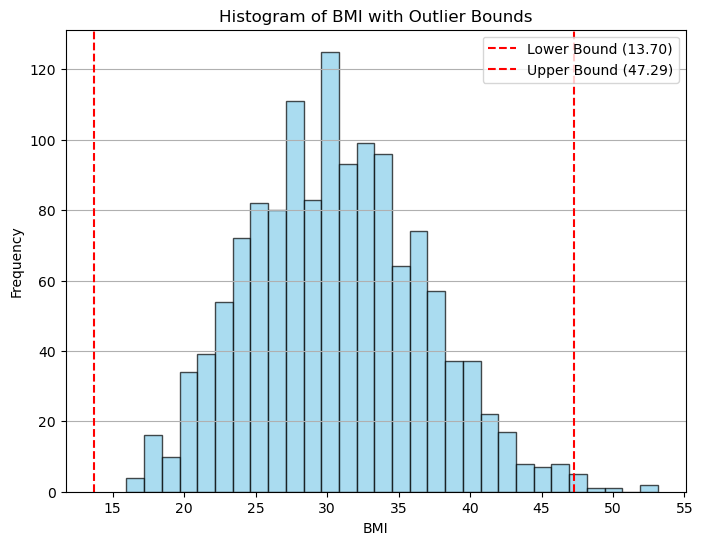

In [85]:

plt.figure(figsize=(8, 6))
plt.hist(data_02['bmi'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound:.2f})')
plt.axvline(upper_bound, color='red', linestyle='--', label=f'Upper Bound ({upper_bound:.2f})')
plt.title('Histogram of BMI with Outlier Bounds')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y')
plt.show()

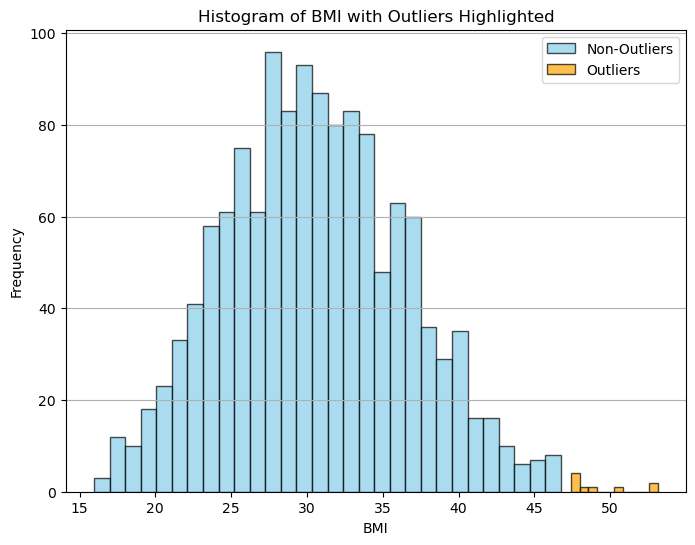

In [88]:
# Separate outliers and non-outliers
outliers = data_02[(data_02['bmi'] < lower_bound) | (data_01['bmi'] > upper_bound)]
non_outliers = data_02[(data_02['bmi'] >= lower_bound) & (data_01['bmi'] <= upper_bound)]

plt.figure(figsize=(8, 6))
plt.hist(non_outliers['bmi'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Non-Outliers')
plt.hist(outliers['bmi'], bins=10, color='orange', edgecolor='black', alpha=0.7, label='Outliers')
plt.title('Histogram of BMI with Outliers Highlighted')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y')
plt.show()

## Data Binning

In [95]:
# Define the bins and labels

bins = [18, 25, 30, 60]
labels = ['Young', 'Senior', 'SuperSenior']

# Perform Binning

cricketers['age_group'] = pd.cut(cricketers['Age'], bins = bins, labels = labels, right = True)

cricketers

,Name,Age,Grade,Role,Rating,Country,age_group
0,Virat,31,3,Batsman,871,IND,SuperSenior
1,Rohit,33,1,Batsman,855,IND,SuperSenior
2,Babar,25,3,Batsman,829,PAK,Young
3,Boult,31,2,Bowler,722,NZ,SuperSenior
4,Bumrah,26,1,Bouler,719,IND,Senior
5,Mujeeb,19,3,Boulen,701,AFG,Young
6,Nabi,35,2,AlL-Reunder,301,AFG,SuperSenior
7,Strokes,29,1,Al-Rounder,285,ENG,Senior


In [103]:
labels = ['Young', 'Senior', 'SuperSenior']

# Perform Binning

cricketers['age_group2'] = pd.cut(cricketers['Age'], bins = 3, labels = labels, right = False)

cricketers

,Name,Age,Grade,Role,Rating,Country,age_group,age_group2
0,Virat,31,3,Batsman,871,IND,SuperSenior,SuperSenior
1,Rohit,33,1,Batsman,855,IND,SuperSenior,SuperSenior
2,Babar,25,3,Batsman,829,PAK,Young,Senior
3,Boult,31,2,Bowler,722,NZ,SuperSenior,SuperSenior
4,Bumrah,26,1,Bouler,719,IND,Senior,Senior
5,Mujeeb,19,3,Boulen,701,AFG,Young,Young
6,Nabi,35,2,AlL-Reunder,301,AFG,SuperSenior,SuperSenior
7,Strokes,29,1,Al-Rounder,285,ENG,Senior,Senior


## One-Hot Encoding (convert to binary values)

In [116]:
# Standardize and clean the Role column
cricketers['Role'] = cricketers['Role'].str.strip().str.lower()

column = ['Role']

dummydata02 = pd.get_dummies(cricketers[column], dtype = int)
dummydata02

,Role_al-rounder,Role_all-reunder,Role_batsman,Role_boulen,Role_bouler,Role_bowler
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,1,0
5,0,0,0,1,0,0
6,0,1,0,0,0,0
7,1,0,0,0,0,0


In [ ]:
cricketers = pd.concat([cricketers, dummydata02], axis = 1)
cricketers


In [120]:
cricketers = cricketers.drop(column, axis = 1)
cricketers

,Name,Age,Grade,Rating,Country,age_group,age_group2,Role_al-rounder,Role_all-reunder,Role_batsman,Role_boulen,Role_bouler,Role_bowler
0,Virat,31,3,871,IND,SuperSenior,SuperSenior,0,0,1,0,0,0
1,Rohit,33,1,855,IND,SuperSenior,SuperSenior,0,0,1,0,0,0
2,Babar,25,3,829,PAK,Young,Senior,0,0,1,0,0,0
3,Boult,31,2,722,NZ,SuperSenior,SuperSenior,0,0,0,0,0,1
4,Bumrah,26,1,719,IND,Senior,Senior,0,0,0,0,1,0
5,Mujeeb,19,3,701,AFG,Young,Young,0,0,0,1,0,0
6,Nabi,35,2,301,AFG,SuperSenior,SuperSenior,0,1,0,0,0,0
7,Strokes,29,1,285,ENG,Senior,Senior,1,0,0,0,0,0


### Removing duplicated records

In [8]:
import pandas as pd

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
# Find a duplicated values

duplicated = data[data.duplicated()]

print('Duplicated Rows: \n')
duplicated

Duplicated Rows: 



,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [18]:
# Removed duplicated data

remove_duplicated = data.drop_duplicates()

remove_duplicated[remove_duplicated.duplicated()]

,age,sex,bmi,children,smoker,region,charges


In [ ]:
# We want to remove duplicated data specify data column (grab a unique data)

data.drop_duplicates(subset = ['children', 'region'])

In [ ]:
# Let's now remove the all records of duplicates without remove last one

data.drop_duplicates(subset = ['children', 'region'], keep = 'last')

In [22]:
df1 = pd.read_csv(f'SOCR-HeightWeight.csv')

df1.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [26]:
df2 = pd.read_csv(f'weight-height.csv')

df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [32]:
print('dataset 01: \n')
display(df1.head())

print('dataset 02: \n')
display(df2.head())

dataset 01: 



,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


dataset 02: 



,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [34]:
# Drop the unwanted data

df1 = df1.drop(columns = ['Index'], axis = 1)
df2 = df2.drop(columns = ['Gender'], axis = 1)

In [36]:
display(df1.head())
display(df2.head())

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [40]:
# Make all dataset features names similar 

df2.rename(columns = {'Height' : 'Height(Inches)', 'Weight' : 'Weight(Pounds)'}, inplace = True)

df2.head()

,Height(Inches),Weight(Pounds)
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [42]:
display(df1.shape, df2.shape)

(25000, 2)

(10000, 2)

In [44]:
# Merge the both datasets together (One below the others)

merge_data = pd.concat([df1, df2], axis = 0)
display(merge_data.shape)

(35000, 2)

## Handle Imbalanced dataset 

In [129]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [133]:
X = data.drop(columns = ['smoker'], axis = 1)

y = data['smoker']

In [135]:
X.head()

,age,sex,bmi,children,region,charges
0,19,0,27.900,0,southwest,16884.92400
1,18,1,33.770,1,southeast,1725.55230
2,28,1,33.000,3,southeast,4449.46200
3,33,1,22.705,0,northwest,21984.47061
4,32,1,28.880,0,northwest,3866.85520


In [137]:
y.head()

0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: object

In [56]:
X.shape

(1338, 6)

In [58]:
y.shape

(1338,)

In [75]:
import tensorflow as tf

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, y_train.shape

((1070, 6), (1070,))

In [143]:
# Data distribution analysis

y_train.value_counts()

smoker
no     850
yes    220
Name: count, dtype: int64

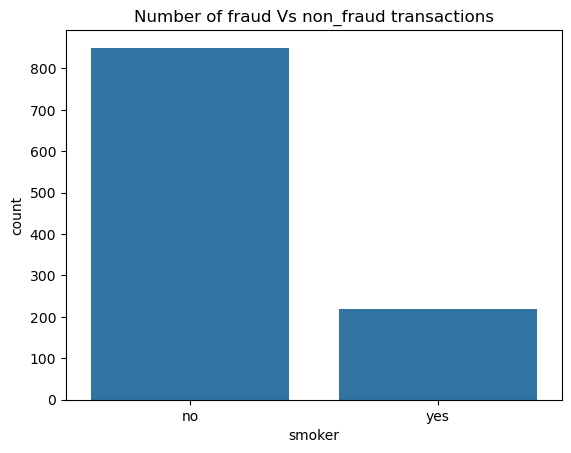

In [145]:
# plot the count of data
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x= y_train, data = X_train)
plt.title('Number of fraud Vs non_fraud transactions')
plt.show()

## Undersampling


### Advantages

* Reduce dataset size
* Low Storage requirement
* Saves Computation Cost
* requires less run time

### Disdvantages

* Will remove useful information while undersampling
* Random sampling may be baised sample

### When to use
* When we have good number of records in our minority class

In [64]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [101]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [103]:
rus = RandomUnderSampler()
rus_X_train, rus_y_train = rus.fit_resample(X_train, y_train)

In [107]:
print('Before sampling class distribution: ',Counter(y_train))
print('After Sampling class distribtion: ',Counter(rus_y_train))

Before sampling class distribution:  Counter({'no': 850, 'yes': 220})
After Sampling class distribtion:  Counter({'no': 220, 'yes': 220})


## OverSampling 

### Advantages
* minimize the problem of overfitting caused by oversampling
* no loss of useful information

### Disavantages
* may introduce additional noise in data
* not effective for high dimentional data

### When to use
* when we have too less observation in minority class

In [119]:
#Label encoding 

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Perform label encoding
data['sex'] = le.fit_transform(data['sex'])

# Display the Dataframe with original and encoded columns
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [109]:
from imblearn.over_sampling import SMOTE

In [147]:
# fitting SMOTE to the train set

smote = SMOTE(random_state = 27)
smote_X_train, smote_y_train = smote.fit_resample(X_train, y_train)

ValueError: could not convert string to float: 'northwest'

In [ ]:
print('Before sampling class distribution: ',Counter(y_train))
print('After Sampling class distribtion: ',Counter(X_train))

In [155]:
# Another method to overSamplling 

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

ros_X_train, ros_y_train = ros.fit_resample(X_train, y_train)

In [159]:
print('Before sampling class distribution: ',Counter(y_train))
print('After Sampling class distribtion: ',Counter(ros_y_train))

Before sampling class distribution:  Counter({'no': 850, 'yes': 220})
After Sampling class distribtion:  Counter({'no': 850, 'yes': 850})
